# Selecting markets to advertize in

In this study, I pretend to be working (in the year 2018) for an (imaginary) eLearning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. Since we are an online company, our courses can basically be followed from anywhere in the world.

We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

Now what we mean with 'markets' in that sentence requires some elaboration. Online marketing may offer the possibility for very targeted campaigns, directed at groups of people with very specific properties (country, income, age, interests, favorite animal, hair color, whatever...) So that makes it hard to say what we mean with a 'market' to advertize in. However, we also want to use more traditional advertizing channels still, which you can organize by country, and therefore *countries* to advertize in is what we are looking for at this point. So that means we are looking for "countries in which advertizing is useful", in a sense that there potential customers live there: people who are interested in our products and are willing to spend on them'.

## Data source

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly however, so instead we explore cheaper options first by making use of existing data that can be found on the internet.

It turns out that [FreeCodeCamp](https://www.freecodecamp.org/), a free eLearning platform that offers courses on web development, has recently performed an [extensive "New Coder Survey"](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969) to which more than 31,000 people responded. (See the article for more details and already interesting outcomes.)

The [survey data](https://github.com/freeCodeCamp/2017-new-coder-survey) is publicly available on GitHub, and that's what we will make use of in this study.

## Initial data exploration

Let's start with reading in the data, and doing some initial exploration (how much data, some examples, useful columns, etc.). The data on GitHub contains 'raw data' and 'clean data'. We'll make use of the 'clean data' for our analysis.

In [1]:
# Import pandas
import pandas as pd
# import data file
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', dtype={'CodeEventOther':'str', 'JobInterestOther': 'str'})
# Check how much data there is (rows, columns)
survey.shape

(18175, 136)

In [2]:
# Explanation about the dtype specification in the cell above

# Upon initial run of the code, I received the following warning:
#    "DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.""


# I have then explored wath these columns 17 and 62 appear to be, by looking at samples and value counts, using the following statements:
#    survey.iloc[:,[17,62]].columns
#    survey.iloc[:,[17,62]].sample(10)
#    survey.iloc[:,17].value_counts()
#    survey.iloc[:,62].value_counts()

# I could not immediately detect what is strange about this data.
# However, it appeared that specifying these columns as string columns makes sense, and it solved the warning message.
# If needed, we can change this later.


The number of rows 18,175 is a bit surprising as we thought to have some 31,000 however it is still of a decent size.

In [3]:
# Show some rows to familiarize ourselves (ensure that all columns are visible)
pd.set_option('display.max_columns', 150)
survey.sample(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
8255,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,United States of America,Mexico,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,0.0,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,5.0,70f601ea12eb4fbdece5881e0a2d16cd,4773189da3a9584aaf6b4d00c9f63d6c,NaN,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spanish,"single, never married",200.0,48.0,acfac6dfad,2017-03-27 21:22:19,2017-03-27 21:13:19,2017-03-27 21:56:00,2017-03-27 21:23:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,bachelor's degree,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4689,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,NaN,student,NaN,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,10.0,2b820980b826b90356e914e7f826fe9f,15ee6fab256902ab0b9ee01b8a65d29e,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freelance,NaN,NaN,NaN,Hindi,"single, never married",0.0,2.0,32e4e46fb9,2017-03-14 20:34:30,2017-03-14 20:30:08,2017-03-14 20:36:58,2017-03-14 20:34:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,bachelor's degree,Civil Engineering,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0
1396,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,1.0,m

In [4]:
# Show for all columns how much data there is. (Requires some arguments to see all info for a large dataframe.)
survey.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
Age                              15367 non-null float64
AttendedBootcamp                 17709 non-null float64
BootcampFinish                   1069 non-null float64
BootcampLoanYesNo                1079 non-null float64
BootcampName                     949 non-null object
BootcampRecommend                1073 non-null float64
ChildrenNumber                   2314 non-null float64
CityPopulation                   15354 non-null object
CodeEventConferences             1609 non-null float64
CodeEventDjangoGirls             165 non-null float64
CodeEventFCC                     1708 non-null float64
CodeEventGameJam                 290 non-null float64
CodeEventGirlDev                 297 non-null float64
CodeEventHackathons              1977 non-null float64
CodeEventMeetup                  2472 non-null float64
CodeEventNodeSchool              446 non-null float64
CodeEventNone 

The column names are reasonably self-explanatory. However, the raw data (which comes in two files) is said to have longer column names that could help us further. Let's read a small sample of those and have a look.

In [5]:
# Import part 1 of the raw data 
survey_raw1 = pd.read_csv('2017-new-coder-survey-part-1.csv', nrows=5)

In [6]:
# Check how many (rows and) columns
survey_raw1.shape

(5, 101)

In [7]:
# Show this sample
survey_raw1

,#,Are you already working as a software developer?,Is this your first software development job?,"Before you got this job, how many months did you spend looking for a job?",Would you prefer to...,Full-Stack Web Developer,Back-End Web Developer,Front-End Web Developer,Mobile Developer,DevOps / SysAdmin,Data Scientist,Quality Assurance Engineer,User Experience Designer,Product Manager,Game Developer,Information Security,Data Engineer,Other,When do you plan to start applying for developer jobs?,About how much money do you expect to earn per year at your first developer job (in US Dollars)?,Would you prefer to work...,Are you willing to relocate for a job?,freeCodeCamp,EdX,Coursera,Khan Academy,Pluralsight / Code School,Codecademy,Udacity,Udemy,Code Wars,The Odin Project,Treehouse,Lynda.com,Stack Overflow,W3Schools,Skillcrush,HackerRank,Mozilla Developer Network (MDN),Egghead.io,CSS Tricks,Other.1,freeCodeCamp study groups,hackathons,conferences,workshops,Startup Weekend,NodeSchool,Women Who Code,Girl Develop It,Meetup.com events,RailsBridge,Game Jam,Rails Girls,Django Girls,weekend bootcamps,Other.2,Code Newbie,The Changelog,Software Engineering Daily,JavaScript Jabber,Ruby Rogues,Shop Talk Show,Developer Tea,Programming Throwdown,.NET Rocks,Talk Python To Me,JavaScript Air,The Web Ahead,CodePen Radio,Giant Robots Smashing into Other Giant Robots,Software Engineering Radio,Other.3,MIT Open Courseware,The New Boston,freeCodeCamp.1,Computerphile,DevTips,Engineered Truth,LearnCode.Academy,CodeCourse,LevelUpTuts,funfunfunction,Coding Tutorials 360,Coding Train (Coding Rainbow),Derek Banas,Simplilearn,Mozilla Hacks,Google Developers,Other.4,About how many hours do you spend learning each week?,About how many months have you been programming for?,Have you attended a full-time coding bootcamp?,Which one?,Have you finished yet?,Did you take out a loan to pay for the bootcamp?,"Based on your experience, would you recommend this bootcamp to your friends?","Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?",Start Date (UTC),Submit Date (UTC),Network ID
0,79ebf38df5af76ed07f343b6b9df592b,0,NaN,NaN,freelance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freeCodeCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-08 22:59:57,2017-03-08 23:02:11,8da0a6d40b
1,6fceea8a8dbb439da36e804e743f5dc1,0,NaN,NaN,start your own business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freeCodeCamp,NaN,NaN,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,Stack Overflow,W3Schools,NaN,NaN,Mozilla Developer Network (MDN),NaN,NaN,NaN,freeCodeCamp study groups,NaN,NaN,NaN,NaN,NodeSchool,NaN,NaN,Meetup.com events,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript Air,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CodeCourse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,12.0,0.0,NaN,NaN,NaN,NaN,200.0,2017-03-09 00:28:01,2017-03-09 00:30:27,61f18b113d
2,02d9465b21e8bd09374b0066fb2d5614,0,NaN,NaN,start your own business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freeCodeCamp,NaN,NaN,NaN,NaN,Codecademy,NaN,Udemy,NaN,NaN,NaN,NaN,NaN,W3Schools,NaN,NaN,Mozilla Developer Network (MDN),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developer Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,6.0,0.0,NaN,NaN,NaN,NaN,150.0,2017-03-09 00:32:59,2017-03-09 00:36:22,6f1fbc6b2b
3,5bfef9ecb211ec4f518cfc1d2a6f3e0c,0,NaN,NaN,work for a nonprofit,Full-Stack Web Developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Within 7 to 12 months,35000.0,in an office with other dev

That's more descriptive indeed. Let's do the same for part 2.

In [8]:
# Import part 1 of the raw data 
survey_raw2 = pd.read_csv('2017-new-coder-survey-part-2.csv', nrows=5)
# Check how many (rows and) columns
survey_raw2.shape

(5, 53)

In [9]:
# Show this sample
survey_raw2

,#,How old are you?,What's your gender?,Other,Which country are you a citizen of?,Which country do you currently live in?,About how many people live in your city?,Are you an ethnic minority in your country?,Which language do you you speak at home with your family?,What's the highest degree or level of school you have completed?,What was the main subject you studied in university?,What's your marital status?,Do you financially support any dependents?,Do you have children?,How many children do you have?,Do you financially support any elderly relatives or relatives with disabilities?,Do you have any debt?,Do you have a home mortgage?,About how much do you owe on your home mortgage (in US Dollars)?,Do you have student loan debt?,About how much do you owe in student loans (in US Dollars)?,"Regarding employment status, are you currently...",Other.1,Which field do you work in?,Other.2,About how much money did you make last year (in US dollars)?,About how many minutes does it take you to get to work each day?,Do you consider yourself under-employed?,Have you served in your country's military before?,Do you receive disability benefits from your government?,Do you have high speed internet at your home?,already_working,jobs_interested_in,want_employment_type,expected_earnings,home_or_remote,will_relocate,attended_event_types,learning_resources,hours_learning_week,months_learning,attend_bootcamp,which_bootcamp,finished_bootcamp,loan_for_bootcamp,recommend_bootcamp,total_spent_learning,podcast,how_soon_jobhunt,youtube,Start Date (UTC),Submit Date (UTC),Network ID
0,21db37adb60cdcafadfa7dca1b13b6b1,34,male,NaN,United States of America,United States of America,"less than 100,000",0,English,"some college credit, no degree",NaN,"single, never married",0,NaN,NaN,NaN,1,0.0,NaN,1.0,NaN,Not working but looking for work,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,No,Full-Stack Web Developer,work for a nonprofit,35000.0,in an office with other developers,Yes,NaN,"Codecademy, Stack Overflow, W3Schools, CSS Tri...",10,6,No,NaN,NaN,NaN,NaN,80,Code Newbie,Within 7 to 12 months,NaN,2017-03-09 00:37:10,2017-03-09 00:38:59,f8f8be6910
1,e0b92236ac53b58f079231e014748dc3,26,male,NaN,Brazil,Brazil,more than 1 million,1,Portuguese,"some college credit, no degree",NaN,married or domestic partnership,1,1.0,1.0,0.0,0,NaN,NaN,NaN,NaN,Employed for wages,NaN,software development and IT,NaN,15000.0,45 to 60 minutes,0.0,0,0,1,Yes,NaN,NaN,NaN,NaN,NaN,NaN,"freeCodeCamp, Udacity, Khan Academy, EdX, Mozi...",5,48,No,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2017-03-09 00:37:32,2017-03-09 00:39:58,bed0457175
2,21ba173828fbe9e27ccebaf4d5166a55,21,male,NaN,United States of America,United States of America,more than 1 million,1,Spanish,high school diploma or equivalent (GED),NaN,"single, never married",0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Employed for wages,NaN,software development and IT,NaN,13000.0,15 to 29 minutes,0.0,0,0,1,No,"Front-End Web Developer, Back-End Web Develo...",work for a medium-sized company,70000.0,no preference,Yes,"NodeSchool, hackathons","Udemy, Codecademy, CSS Tricks, freeCodeCamp, M...",25,5,No,NaN,NaN,NaN,NaN,1000,"Shop Talk Show, The Changelog, CodePen Radio, ...",Within 7 to 12 months,NaN,2017-03-09 00:38:02,2017-03-09 00:40:14,2ed189768e
3,3be37b558f02daae93a6da10f83f0c77,26,male,NaN,Brazil,Brazil,"between 100,000 and 1 million",0,Portuguese,"some college credit, no degree",NaN,married or domestic partnership,1,0.0,NaN,0.0,1,1.0,40000.0,0.0,NaN,Employed for wages,NaN,software development and IT,NaN,24000.0,I work from home,1.0,0,0,1,No,"Front-End Web Developer, Full-Stack Web Deve...",work for a medium-sized company,40000.0,from home,NaN,NaN,"Mozilla Developer Network (MDN), Egghead.io, f...",14,5,No,NaN,NaN,NaN,NaN,0,NaN,Within the next 6 months,NaN,2017-03-09 00:40:18,2017-03-09 00:42:26,dbdc0664d1
4,d7c56bbf2c7b62096be9db010e86d96d,20,female,NaN,Portugal,Portugal,"between 100,000 and 1 million",0,Portuguese,bachelor's degree,Information Technology,"single, never married",0,Na

The total number of columns in both of the two 'raw' files combined is larger than the number of columns in the 'clean' file, and in a different sequence. Any attempts to somehow combine this (technically) are going to be difficult.

Rather, by eye-balling and column names and data samples in all sets, I made an initial cut of what could be interesting columns (from the 'clean' data) for our purpose. That includes:
* where do people live (CountryLive)
* what jobs are they interested in; as a proxy for what they are interested to learn (JobRoleInterest, and all separate JobInterest*** columns)
* how much spent for learning so far (MoneyForLearning); as an indicator for what people are *willing* to spend
* employment status (EmploymentStatus)
* age, gender (Age, Gender)

Let's do some pre-work that will help us with our analysis, then continue.

In [12]:
# To make data samples more readable, let's get a subset of the columns of interest
# If along the way we figure out that we need additional columns still: we can still add and re-run (which was done several times indeed)

# Get the names of all columns regarding JobInterest
columns_jobint = survey.columns[survey.columns.str.startswith('JobInterest')].tolist()
# get some other relevant columns
columns_other = ['Age', 'Gender', 'CountryLive','EmploymentStatus','AttendedBootcamp','MoneyForLearning', 'MonthsProgramming','JobRoleInterest']

# Combine them
columns_of_interest = columns_other + columns_jobint

# Create and show a sample of the more compact dataframe
survey_compact = survey[columns_of_interest].copy()
print (survey_compact.shape)
survey_compact.head(5)

(18175, 21)


,Age,Gender,CountryLive,EmploymentStatus,AttendedBootcamp,MoneyForLearning,MonthsProgramming,JobRoleInterest,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX
0,27.0,female,Canada,Employed for wages,0.0,150.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,male,United States of America,Not working but looking for work,0.0,80.0,6.0,Full-Stack Web Developer,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,male,United States of America,Employed for wages,0.0,1000.0,5.0,"Front-End Web Developer, Back-End Web Develo...",1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,26.0,male,Brazil,Employed for wages,0.0,0.0,5.0,"Front-End Web Developer, Full-Stack Web Deve...",1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.0,female,Portugal,Not working but looking for work,0.0,0.0,24.0,"Full-Stack Web Developer, Information Security...",1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN


## Checking people's interest

In the introduction I wrote that the majority of our courses are on web and mobile development. (While we also cover many other domains, like data science, game development, etc.) A first thing to check is what the people who filled out the survey are actually interested in: does that indeed match the topics that we have something to offer for.

More in statistical terms: let us check whether the sample that we have (over 18,000 records) is a meaningful sample for the population that we want to investigate (all our potential customers): wannabe-programmers-especially-on-web-or-mobile-anywhere-in-the-world.

The data contains one column 'JobInterest' with combined entries like "Full-Stack Web Developer, Information Security..." and also individual columns for each of those topics. Let's use the individual ones to get insight in what people are interested in.

As mentioned before but important: this is what *jobs* people are interested in, and we consider that a good proxy for what *eLearning topics* people are interested in.

In [13]:
# Calculate per topic the percentage of respondents that showed interest in this topic
interest_totals_percentages = (100*survey[columns_jobint].sum()/survey.shape[0]).sort_values(ascending = False)
# Show it
interest_totals_percentages.round(1)

JobInterestFullStack    26.6
JobInterestFrontEnd     22.3
JobInterestBackEnd      17.6
JobInterestMobile       14.7
JobInterestDataSci      10.7
JobInterestGameDev      10.3
JobInterestUX            9.3
JobInterestInfoSec       8.6
JobInterestDataEngr      8.1
JobInterestDevOps        6.0
JobInterestProjMngr      5.2
JobInterestQAEngr        3.2
dtype: float64

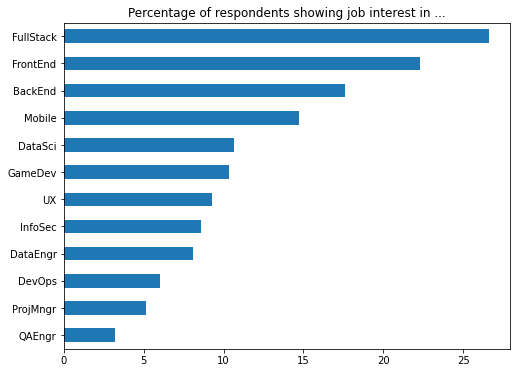

In [14]:
# Show in a chart

import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize = (8,6))

# Plot percentates
interest_totals_percentages.plot(kind = 'barh', title = 'Percentage of respondents showing job interest in ...')

# Sort from high to low
plt.gca().invert_yaxis()

# Set more readable labels
myticklabels = interest_totals_percentages.index.str[11:].tolist()
ax.set_yticklabels(myticklabels)

plt.show()

That looks promising, in a sense that most interest is shown in:
* web development: FullStack, FrontEnd, BackEnd are actually short for "Full Stack Web Development", "Front End Web..." etc as could be learnt from the data descriptions
* mobile development

To get better understanding of the percentages, we should go a step deeper though, as one thing that we ignored is that many people may not have expressed any interest at all; it was not mandatory to fill it out. Let's dig into this. 

In [15]:
# Check how many people show any job interest

samplesize = survey.shape[0]
any_interest = survey['JobRoleInterest'].notnull().sum()
no_interest = survey['JobRoleInterest'].isna().sum()

print('Total sample size:', samplesize)
print('Total expressing any job interest:', any_interest)
print('Total not expressing their job interest', no_interest)
print('Percentage expressing any job interest:', (100*any_interest/samplesize).round(1), '%')
print('Percentage not expressing any job interest:', (100*no_interest/samplesize).round(1), '%')


Total sample size: 18175
Total expressing any job interest: 6992
Total not expressing their job interest 11183
Percentage expressing any job interest: 38.5 %
Percentage not expressing any job interest: 61.5 %


That's actually a majority where the interest was not specified at all.

Therefore, let's look again at the percentage-per-topic as above, but now only for the respondents who filled out any interest in the first place, as that may be more representative.

In [16]:
# Filter out the rows where JobRoleInterest is not null
survey_jobinterest = survey[survey['JobRoleInterest'].notnull()]

# Check whether we kept the right amount of rows:
print ('Did we keep the correct amount of data?')
print ('We should have selected', any_interest, 'records, and we selected', survey_jobinterest.shape[0],'.')
print ('Same:', any_interest == survey_jobinterest.shape[0],'.')


Did we keep the correct amount of data?
We should have selected 6992 records, and we selected 6992 .
Same: True .


In [17]:
# Calculate per topic the percentage of 'responsive' respondents that showed interest in this topic
interest_jobinterest_totals_percentages = (100*survey_jobinterest[columns_jobint].sum()/survey_jobinterest.shape[0]).sort_values(ascending = False)
# Show it
interest_jobinterest_totals_percentages.round(1)

JobInterestFullStack    59.9
JobInterestFrontEnd     50.5
JobInterestBackEnd      39.6
JobInterestMobile       32.9
JobInterestDataSci      23.5
JobInterestGameDev      23.2
JobInterestUX           21.0
JobInterestInfoSec      18.9
JobInterestDataEngr     17.8
JobInterestDevOps       13.2
JobInterestProjMngr     11.6
JobInterestQAEngr        7.1
dtype: float64

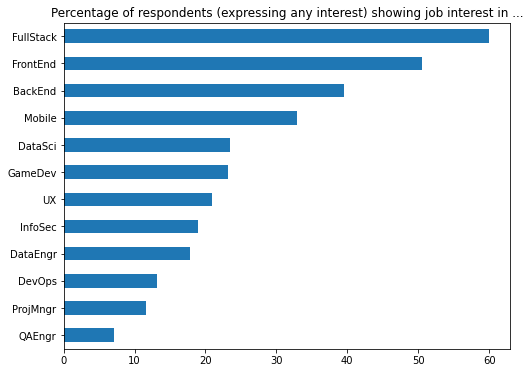

In [18]:
# Show it in a graph
fig,ax = plt.subplots(figsize = (8,6))

# Plot percentates
interest_jobinterest_totals_percentages.plot(kind = 'barh', title = 'Percentage of respondents (expressing any interest) showing job interest in ...')

# Sort from high to low
plt.gca().invert_yaxis()

# Set more readable labels
myticklabels = interest_jobinterest_totals_percentages.index.str[11:].tolist()
ax.set_yticklabels(myticklabels)

plt.show()

That is even more promising in terms of interest in 'web' and 'mobile', however we ignored one thing. Already from the data sample, and also from this graph, it is clear that many people show interest in *multiple* topics. To be able to analyze better, let's calculate for every row:
* for how many topics interest is shown
* for the 3 'web development' ones (FullStack, FrontEnd, BackEnd), interest is in how many of each of them
* for the 3 'web development' ones, whether interest is in at least one of them (since we offer courses for web)
* whether there is interest in (at least) either 'web' or 'mobile' (since that's where we offer most courses)

We'll add this to our 'compact' version of the data.

In [19]:
# Calculate the new fields described just now
survey_compact['interests_count'] = survey_compact[columns_jobint].sum(axis=1)
survey_compact['interest_web_count'] = survey_compact[['JobInterestBackEnd', 'JobInterestFrontEnd','JobInterestFullStack']].sum(axis=1)
survey_compact['interest_web_bool'] = (survey_compact['interest_web_count'] >0).astype(int)
survey_compact['interest_web_andor_mobile_bool'] = ((survey_compact[['JobInterestMobile','interest_web_bool']].sum(axis=1))>0).astype(int)


In [20]:
# Check: the number of rows with interests_count > 0 should be the same as what we calculated earlier when using the 'overall' column
any_interest_alternative = len (survey_compact[survey_compact['interests_count']>0])
print('Rows where at least one topic was marked as topic of interest:', any_interest_alternative)
print('Rows where the combined topic interest was filled out: ', any_interest)

Rows where at least one topic was marked as topic of interest: 7986
Rows where the combined topic interest was filled out:  6992


Oops... that is a big difference. It seems to be that there are 994 records where the 'overall' indicator of job interest is NULL, but still individual preferences are given. 

Doesn't make sense really. I should have checked this before possibly. Let me dig into it now still.

In [21]:
# Check how many such rows can be detected, using the same criteria
len(survey_compact[survey_compact['JobRoleInterest'].isnull() & survey_compact['interests_count']>0])

1134

That gets even more confusing, the expected outcome of this was 994! Did I make a mistake? Let's check a sample anyway.

In [22]:
# Show some rows where the 'overall' job interest is empty, but individual ones are still given
survey_compact[survey_compact['JobRoleInterest'].isnull() & survey_compact['interests_count']>0].sample(20, random_state = 0)

,Age,Gender,CountryLive,EmploymentStatus,AttendedBootcamp,MoneyForLearning,MonthsProgramming,JobRoleInterest,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,interests_count,interest_web_count,interest_web_bool,interest_web_andor_mobile_bool
11064,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,1,1
13449,NaN,NaN,NaN,NaN,0.0,0.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0
11042,NaN,NaN,NaN,NaN,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1
11391,NaN,NaN,NaN,NaN,0.0,300.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0
11206,NaN,NaN,NaN,NaN,0.0,400.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1
10873,NaN,NaN,NaN,NaN,0.0,70.0,24.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,6.0,3.0,1,1
10064,NaN,NaN,NaN,NaN,0.0,0.0,48.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5.0,2.0,1,1
11926,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,3.0,0.0,0,1
10147,NaN,NaN,NaN,NaN,1.0,14000.0,7.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,3.0,1,1
11033,NaN,NaN,NaN,NaN,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1


These are all good examples indeed: for all of these there are *individual* job interests, but there is no 'overall' one.

That leaves us with two questions.

Q1. Which is more reliable: overall 'JobRoleInterest', or the individual ones ('JobInterest...')?

A1. I have tried to find back from the documentation on Github, including the published cleaning script and the original raw data files what happened here and why these fields don't match. Not easy to figure out. However the impression I got was that the survey asked about the *individual* ones. I choose to continue with those.

Q2. Why is there a difference of 996 between the counts, but if you want to check them you find 1134? What is correct?

A2. In all honesty, I don't have an answer. It may be a coding or interpretation error on my end. Given the even more time it would take to figure that out, and considering that very likely it would **not** make a difference for my conclusions of this section after all, I decide to let this one go.

(What is written in the two Q&A above also means that the numbers in the graphs above may not be completely correct. However for our current purpose it's not going to make a significant difference. So I am also not going to redo those. Let's continue!)

In [23]:
# Still check the other new columns calculated above
survey_compact[['JobInterestBackEnd', 'JobInterestFrontEnd','JobInterestFullStack','JobInterestMobile', 'interests_count', 'interest_web_count', 'interest_web_bool', 'interest_web_andor_mobile_bool']].head(50)

,JobInterestBackEnd,JobInterestFrontEnd,JobInterestFullStack,JobInterestMobile,interests_count,interest_web_count,interest_web_bool,interest_web_andor_mobile_bool
0,NaN,NaN,NaN,NaN,0.0,0.0,0,0
1,NaN,NaN,1.0,NaN,1.0,1.0,1,1
2,1.0,1.0,1.0,1.0,5.0,3.0,1,1
3,1.0,1.0,1.0,NaN,3.0,3.0,1,1
4,1.0,1.0,1.0,1.0,5.0,3.0,1,1
5,NaN,NaN,NaN,NaN,0.0,0.0,0,0
6,NaN,NaN,1.0,NaN,1.0,1.0,1,1
7,NaN,NaN,NaN,NaN,0.0,0.0,0,0
8,NaN,NaN,NaN,NaN,0.0,0.0,0,0
9,1.0,1.0,1.0,NaN,6.0,3.0,1,1


Checking examples manually... looks good. So let's create a new dataframe again: the 'compact' version with only those rows where there is at least one interest.

In [24]:
# Create our new dataset: only include respondents that showed interest in at least one topic
survey_compact_anyinterest = survey_compact[survey_compact["interests_count"]>0].copy()
# Check the number of rows. Should be 7986
survey_compact_anyinterest.shape

(7986, 25)

Now let's calculate some statistics for this set of records with 'at least one interest'

In [25]:
# Show how many topics were marked as 'interest' by respondents
survey_compact_anyinterest['interests_count'].value_counts().sort_index()

1.0     2507
2.0      881
3.0     1270
4.0     1237
5.0      937
6.0      528
7.0      316
8.0      141
9.0       81
10.0      41
11.0      16
12.0      31
Name: interests_count, dtype: int64

In [26]:
# Show how many topics were marked as 'interest' by respondents, in percentages
survey_compact_anyinterest['interests_count'].value_counts(normalize = True).sort_index().mul(100).round(1)

1.0     31.4
2.0     11.0
3.0     15.9
4.0     15.5
5.0     11.7
6.0      6.6
7.0      4.0
8.0      1.8
9.0      1.0
10.0     0.5
11.0     0.2
12.0     0.4
Name: interests_count, dtype: float64

More than half of the people expressed interest in more than one topic. Some did in more than 5 or even more than 10. They may know less what they are looking for at this point.

In [27]:
# Calculate the number of web-related interests
survey_compact_anyinterest['interest_web_count'].value_counts().sort_index()

0.0    1335
1.0    3112
2.0    1650
3.0    1889
Name: interest_web_count, dtype: int64

Thousands of respondents showed interest in 1, 2 or all 3 of the web-development related topics.

In [28]:
# Calculate how many at least have one web-related interest
survey_compact_anyinterest['interest_web_bool'].value_counts()

1    6651
0    1335
Name: interest_web_bool, dtype: int64

6651, to be precise.

In [29]:
# Calculate how many have interest in web and/or mobile
survey_compact_anyinterest['interest_web_andor_mobile_bool'].value_counts()

1    6957
0    1029
Name: interest_web_andor_mobile_bool, dtype: int64

While 6957 showed interest in web and/or mobile development.

In [30]:
# Percentage interested in web:
print(100*len(survey_compact_anyinterest[survey_compact_anyinterest['interest_web_bool'] == 1])/len(survey_compact_anyinterest))
# Percentage interested in web and/or mobile:
print(100 * len(survey_compact_anyinterest[survey_compact_anyinterest['interest_web_andor_mobile_bool'] == 1])/len(survey_compact_anyinterest))

83.2832456799399
87.11495116453794


That was a lot of numbers. They key numbers are that,of those respondents that expressed interest in at least one topic:
* 83% expressed interest in web development
* 33% expressed interest in mobile development
* 87% expressed interest in at least one of those two

With that, I conclude that this can be considered a good dataset to continue our analysis with, as many of the respondents show interest in the topics that we have most eLearnings for.

For further analysis, I continue with the sample where people expressed interest in at least one topic. For those who didn't, we don't know much at all so it feels unsafe to include them in the next part of the analysis: figuring out 'markets'. 

## Where are people located

As discussed above, we continue with the subset where people expressed at least one interest. Of that set, let's figure out where they are located: remember we want to figure out countries to advertise in. (The data contains'country of origin' and 'country currently living'. The latter makes most sense for our purpose and we'll use that.)

In [31]:
# Show percentage of respondents breakdown per country (percentage)
(100*survey_compact_anyinterest['CountryLive'].value_counts(normalize = True)).round(2).head(10)

United States of America    45.57
India                        7.71
United Kingdom               4.64
Canada                       3.79
Poland                       1.94
Brazil                       1.89
Germany                      1.85
Australia                    1.64
Russia                       1.49
Ukraine                      1.33
Name: CountryLive, dtype: float64

So by far the USA is the country with most respondents, followed by India, the UK and Canada. After that a lot of countries with lower (and similar) numbers.

Those top 4 countries may be good countries to advertise in then, however there is more to figure out. It only makes sense to advertise in countries where people are willing to spend money on training. Note that there is a lot of free eLearning available as well on the internet, and countries where everyone chooses to learn for free may be of less interest. In the next section we'll dig into this.

## How much money do they (want to) spend?

To learn more about this topic, let's first have a look at a sample of the data again.

In [32]:
# Show a (reproducable) random data sample
survey_compact_anyinterest.sample(10, random_state = 0)

,Age,Gender,CountryLive,EmploymentStatus,AttendedBootcamp,MoneyForLearning,MonthsProgramming,JobRoleInterest,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,interests_count,interest_web_count,interest_web_bool,interest_web_andor_mobile_bool
9219,15.0,male,Spain,Not working and not looking for work,0.0,0.0,50.0,Back-End Web Developer,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1
13483,24.0,male,Poland,Not working but looking for work,0.0,200.0,3.0,"Front-End Web Developer, User Experience D...",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,Entrepreneur,NaN,NaN,1.0,3.0,1.0,1,1
12230,20.0,female,Canada,Not working but looking for work,0.0,10.0,24.0,"Game Developer, Full-Stack Web Developer, Fr...",NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,1,1
4066,29.0,female,Russia,Employed for wages,0.0,NaN,5.0,"Data Scientist, Front-End Web Developer",NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1,1
3687,26.0,male,Czech Republic,Employed for wages,0.0,100.0,8.0,Full-Stack Web Developer,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1
343,21.0,male,Greece,NaN,0.0,0.0,30.0,"Information Security, Back-End Web Developer, ...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,1,1
2409,25.0,female,United States of America,Employed for wages,0.0,3000.0,10.0,Front-End Web Developer,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1
8477,26.0,male,Israel,Employed for wages,0.0,5000.0,6.0,"Full-Stack Web Developer, Front-End Web Deve...",NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1,1
5308,19.0,male,India,Not working but looking for work,0.0,1200.0,12.0,Information Security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0
11943,NaN,NaN,NaN,NaN,0.0,300.0,8.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,1.0,1,1


Interesting columns are:
* MoneyForLearning. This shares how much was already spent on learning to code (for those who wanted to share). Let's consider this a good indicator (per country) for the *willingness to spend* - which we are looking for.
* MonthsProgramming. This shares since how long people are programming. The reason why this is interesting, is that we can divide the total amount by this number of months. This may give some sort of indication how much people are willing to spend *per month* on learning to code. This is interesting for us, since our eLearning platform is subscription based ($59 dollar per month).

There is definitely something to discount about this way of calculation. E.g. the money-spent was maybe not equally over the months but in one go. Let's give it a try anyway to calculate this 'spent-per-month' figure.

In [33]:
# check what values we have for MonthsProgramming
print(survey_compact_anyinterest['MonthsProgramming'].unique())
print('Null values count:', survey_compact_anyinterest['MonthsProgramming'].isnull().sum())
print('Zero values count:', len(survey_compact_anyinterest[survey_compact_anyinterest['MonthsProgramming']==0.0]))

[  6.   5.  24.  12.  18.   1.  nan   9.  14.  28.   3.   2.  25.   8.
  32.  60.  19.  36.  30.  48.  10.  15.  40.  20.   4.   0.  16.  26.
  13.  11.  29.  72.  50.   7.  17.  54.  84. 240.  42.  34.  55.  59.
  51. 200.  70.  44.  49. 105.  80.  45. 744.  21.  96.  46.  31.  22.
 108.  23.  39. 120.  43.  35.  33.  52.  75.  41.  27. 180. 100. 360.
 113. 124. 370.  86. 144.  73.  83. 190.  56.  38.  37. 103. 132.  63.
  69. 156. 140. 171. 198. 264.  58. 480. 111. 408. 300.  89.]
Null values count: 460
Zero values count: 281


For dividing by MonthsProgramming:
* let's ignore all rows where MonthsProgramming is NULL, as we simply don't know and no number would be reasonable estimate (okay, maybe the mean of the known values would do, but not putting effort in this)
* let's change 0 to 1 (we cannot divide by 0), as it's reasonable to assume that if someone filled out 0 months, these are fresh learners that just started 

Then, let's calculate the (average) amount of money spent per month-learning and store it in a new column.

In [34]:
# Calculate SpentPerMonth (with the comments above)
sca_knownmonths = survey_compact_anyinterest[survey_compact_anyinterest['MonthsProgramming'].notnull()].copy()

sca_knownmonths.loc[sca_knownmonths['MonthsProgramming']==0.0,'MonthsProgramming'] = 1.0
sca_knownmonths['SpentPerMonth'] = sca_knownmonths['MoneyForLearning']/sca_knownmonths['MonthsProgramming']

# Show a sample including the new column (to check correctness and see some first values)
sca_knownmonths.sample(10, random_state = 0)

,Age,Gender,CountryLive,EmploymentStatus,AttendedBootcamp,MoneyForLearning,MonthsProgramming,JobRoleInterest,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,interests_count,interest_web_count,interest_web_bool,interest_web_andor_mobile_bool,SpentPerMonth
11569,NaN,NaN,NaN,NaN,0.0,0.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,0.000000
17996,32.0,male,United States of America,Employed for wages,0.0,0.0,3.0,Information Security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0.000000
12613,21.0,male,India,Not working but looking for work,0.0,200.0,24.0,Front-End Web Developer,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,8.333333
18160,62.0,male,Argentina,Employed for wages,0.0,100.0,3.0,User Experience Designer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0,0,33.333333
201,27.0,male,United Kingdom,Employed for wages,0.0,250.0,12.0,"Data Engineer, Full-Stack Web Developer, Fro...",NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1,1,20.833333
15176,28.0,male,Hungary,Employed for wages,0.0,0.0,72.0,"Full-Stack Web Developer, Data Scientist, ...",NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5.0,2.0,1,1,0.000000
10302,NaN,NaN,NaN,NaN,0.0,80.0,30.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1.0,1,1,2.666667
6771,26.0,male,Ireland,Self-employed freelancer,0.0,NaN,24.0,"Full-Stack Web Developer, Front-End Web Deve...",NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1,1,NaN
11653,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,NaN
10324,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,6.0,3.0,1,1,0.000000


In [35]:
# Let's see what value we have for SpentPerMonth
sca_knownmonths['SpentPerMonth'].value_counts(dropna=False).sort_index()

0.000000        3543
0.033333           1
0.050000           1
0.055556           1
0.066667           1
                ... 
30000.000000       1
40000.000000       1
50000.000000       2
80000.000000       1
NaN              381
Name: SpentPerMonth, Length: 525, dtype: int64

That's quite a range it seems. We'll explore further.
However let's first drop the rows where SpentPerMonth is NULL. (This will be caused by `MoneyForLearning` being NULL in the first place; could/should have dropped those before.)

In [36]:
# Drop rows accordingly, and check the result
print('Rowcount before dropping:', sca_knownmonths.shape[0])
sca_knownmonths = sca_knownmonths[sca_knownmonths['SpentPerMonth'].notnull()]
print('Rowcount before dropping:', sca_knownmonths.shape[0], 'which should be 381 less')

Rowcount before dropping: 7526
Rowcount before dropping: 7145 which should be 381 less


Let's create a histogram to get better understanding of the values.

<AxesSubplot:title={'center':'Amount spent per month'}, ylabel='Frequency'>

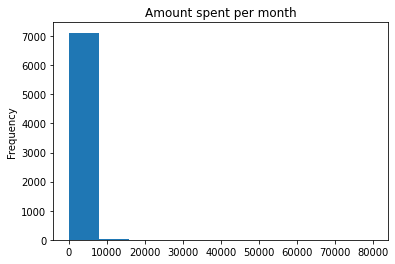

In [37]:
# Histogram for SpentPerMonth
sca_knownmonths['SpentPerMonth'].plot.hist(title='Amount spent per month')

The insight this gives is that we have lots of relatively low values and a few much higher ones, some quite extreme values even. Let's also show a box plot to get a bit more insight.

<AxesSubplot:title={'center':'Amount spent per month'}>

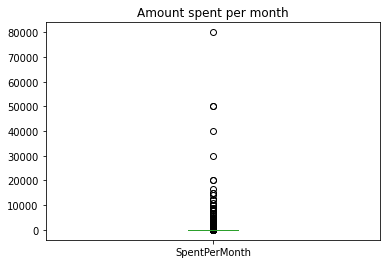

In [38]:
sca_knownmonths['SpentPerMonth'].plot.box(title='Amount spent per month')

Still the same conclusion basically as from the histogram. We're going to dig further. 

That is, let's start calculating some statistics for the top 4 countries from our earlier list: the United Status, India, United Kingdom and Canada. They are our initial shortlist for countries to advertise in, and we want to compare those.

In [39]:
# Create subset of the data for the 4 countries of interest
countries_of_interest = ['United States of America', 'India', 'United Kingdom', 'Canada']
scak_4countries = sca_knownmonths[sca_knownmonths['CountryLive'].isin(countries_of_interest)]

In [40]:
# Calculate the number of respondents per country (meeting all criteria applied so far: showing interest in at least one topic, and having specified how much they spent and how long they are programming for).
scak_count = scak_4countries['CountryLive'].value_counts()
scak_count

United States of America    2867
India                        454
United Kingdom               275
Canada                       234
Name: CountryLive, dtype: int64

In [41]:
# Get the mean and median values of SpentPerMonth
four_countries_stats = scak_4countries.groupby('CountryLive')['SpentPerMonth'].agg(['mean', 'median'])
four_countries_stats

,mean,median
CountryLive,,
Canada,116.315373,0.0
India,136.229260,0.0
United Kingdom,46.173126,0.0
United States of America,230.740069,4.0


In [42]:
# Calculate (per country) how many respondents spent anything in the first place 
scak_non_zeroes = scak_4countries[scak_4countries['SpentPerMonth']>0]['CountryLive'].value_counts()
scak_non_zeroes

United States of America    1595
India                        196
United Kingdom               135
Canada                       112
Name: CountryLive, dtype: int64

A lot of numbers. Let's combine them into one overview for better readability.

In [43]:
# Combining the statistics above into one dataframe. (Probably there is cleaner code for it, but this works...)
all_combined1 = pd.merge(scak_count.to_frame(),scak_non_zeroes.to_frame(), left_index=True, right_index=True)
all_combined2 = pd.merge(all_combined1, four_countries_stats, left_index=True, right_index=True)
all_combined2.rename(columns={'CountryLive_x': 'respondents', 'CountryLive_y': 'respondents spending > 0', 'mean':'spending mean', 'median':'spending median'}, inplace=True)
all_combined2['perc spending > 0'] = (all_combined2['respondents spending > 0']/all_combined2['respondents']*100).round(1)
all_combined2

,respondents,respondents spending > 0,spending mean,spending median,perc spending > 0
United States of America,2867,1595,230.740069,4.0,55.6
India,454,196,136.229260,0.0,43.2
United Kingdom,275,135,46.173126,0.0,49.1
Canada,234,112,116.315373,0.0,47.9


What do we observe:
- In all countries, approximately half of the people that are still part of our dataset spent nothing at all. No big differences between the countries.
- In the USA, not only the number of people is highest, also their mean spending is highest.
- India and Canada are fairly similar in SpentPerMonth. India has more respondents though.
- The UK is trailing quite far behind.

It looks like USA is really one of the countries to advertise in. UK seems like a less good candidate. India and Canada are too close to call based on this.

However, we've seen that there are very high values (up to 80,000) for SpentPerMonth, and those will be influencing the mean value significantly. So before drawing conclusions we're going to dig further into the distribution, and also into these extreme values.

We'll start with creating some box plots for all four countries, for SpentPerMonth.

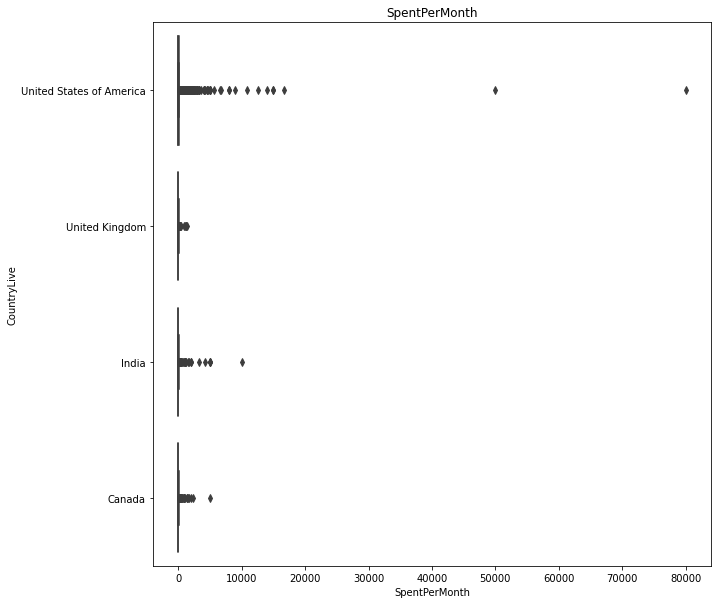

In [44]:
# Create box plots of SpentPerMonth
import seaborn as sns
fig = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'SpentPerMonth', y= 'CountryLive', data = scak_4countries)
plt.title('SpentPerMonth')
plt.show()

Not much to see. Let's draw again, but leaving out the very extreme outliners on the right.
Also, let us leave out the 0-values for now. We know that about half of the values is 0, which would mean that half of the box-plot is taken by those.

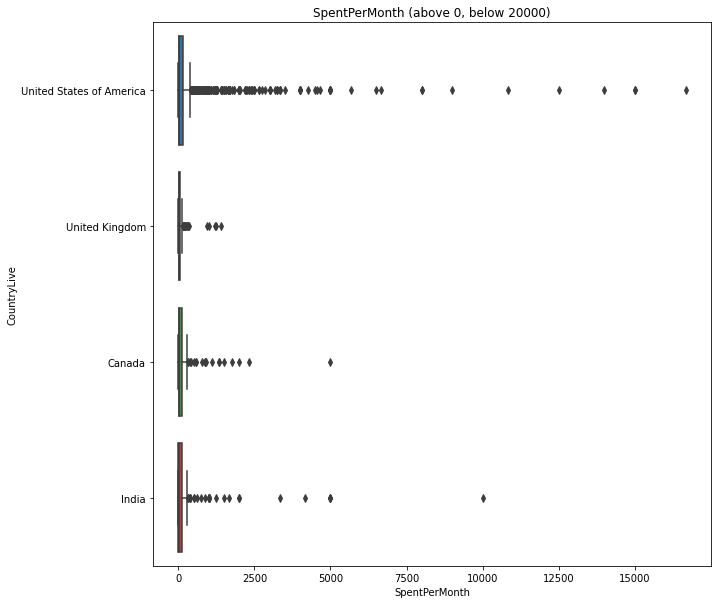

In [45]:
# Create box plots of SpentPerMonth (above 0, below 20000)
fig = plt.subplots(figsize=(10,10))
datasubset = scak_4countries[(scak_4countries['SpentPerMonth']> 0) & (scak_4countries['SpentPerMonth']<20000)]
sns.boxplot(x = 'SpentPerMonth', y= 'CountryLive', data = datasubset)
plt.title('SpentPerMonth (above 0, below 20000)')
plt.show()

Still not much, let's only show below one 1000.

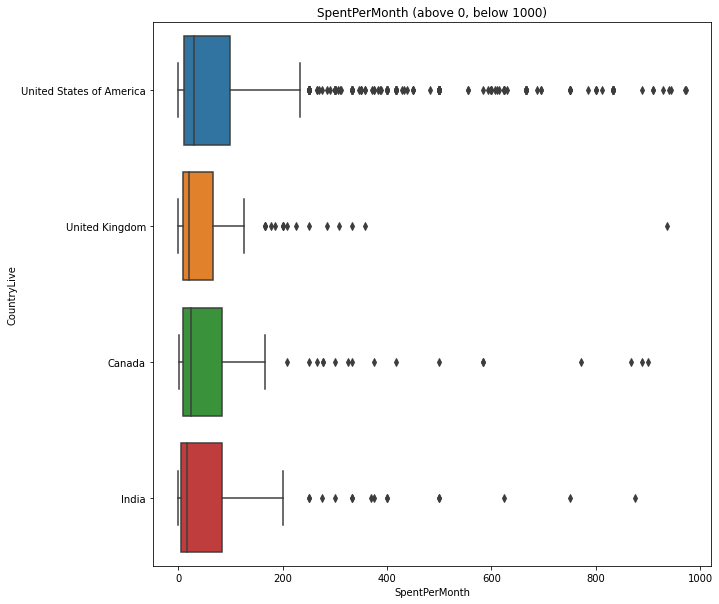

In [46]:
# Create box plots of SpentPerMonth (above 0, below 1000)
fig = plt.subplots(figsize=(10,10))
datasubset = scak_4countries[(scak_4countries['SpentPerMonth']> 0) & (scak_4countries['SpentPerMonth']<1000)]
sns.boxplot(x = 'SpentPerMonth', y= 'CountryLive', data = datasubset)
plt.title('SpentPerMonth (above 0, below 1000)')
plt.show()

Nice pictures, and we're getting some insights in the distribution. However it does not really bring us much closer yet to answering our question which country (other than the USA) to advertise in. There are just a lot of 'high values' that have impact, without really understanding much about them.

Let's take a look at a sample of respondents who spent a lot. We'll look at our original dataset (in which we have total spending, not spending per month).

In [47]:
# Show a sample of respondents for which amount spent is above 1000
survey[survey['MoneyForLearning']>1000].sample(20, random_state = 0)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
12549,25.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Vietnam,Italy,NaN,NaN,Not working but looking for work,NaN,12000.0,1.0,NaN,female,NaN,0.0,0.0,1.0,1.0,NaN,0.0,NaN,NaN,40.0,4df82175100b946aa21f6e03c93eb7a5,b0f46ea800893f2205209187d6ceb479,NaN,0.0,0.0,0.0,NaN,I'm already applying,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Full-Stack Web Developer, Data Engineer, Dev...",in an office with other developers,Vietnamese,"single, never married",4000.0,4.0,5ae92021b7,2017-03-22 00:38:55,2017-03-22 00:11:11,2017-03-22 00:43:07,2017-03-22 00:39:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Data Skeptic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,bachelor's degree,Telecommunications Technician,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
46,26.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,NaN,student,NaN,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,200000.0,55.0,ef1f5e70e6fdf24676e2990fe698d1cf,c2d66ded7078ec88f2324456f7327ee8,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,"single, never married",14000.0,15.0,a86ac5b8ca,2017-03-09 02:34:10,2017-03-09 02:31:19,2017-03-09 02:36:26,2017-03-09 02:34:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,bachelor's degree,Accounting,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
7441,25.0,1

By studying the data (and bringing in some domain knonwledge), one piece of info that may be interesting is whether people attended a bootcamp. A bootcamp is a one-time event that can cost be quite costly. If many of our big spenders attended bootcamp, then that may impact what we want to conclude.

Let's focus on India and Canada, who are still in the race for 2nd place (after the USA).

In [48]:
# Show subset for India where a lot is spent (> 200/month)

columns_to_show = ['CountryLive', 'AttendedBootcamp', 'SpentPerMonth', 'MoneyForLearning']
rows_boolean_filter = (scak_4countries['SpentPerMonth']>200) & (scak_4countries['CountryLive']=='India')
scak_4countries.loc[rows_boolean_filter, columns_to_show].sort_values('SpentPerMonth', ascending = False)

,CountryLive,AttendedBootcamp,SpentPerMonth,MoneyForLearning
13398,India,0.0,10000.000000,20000.0
8126,India,0.0,5000.000000,5000.0
7989,India,0.0,5000.000000,5000.0
1728,India,0.0,5000.000000,20000.0
15587,India,0.0,4166.666667,100000.0
1755,India,0.0,3333.333333,50000.0
12451,India,0.0,2000.000000,8000.0
9410,India,0.0,2000.000000,2000.0
6913,India,1.0,1666.666667,5000.0
6350,India,0.0,1500.000000,15000.0


In [49]:
# Show subset for Canada where a lot is spent (> 200/month)

columns_to_show = ['CountryLive', 'AttendedBootcamp', 'SpentPerMonth', 'MoneyForLearning']
rows_boolean_filter = (scak_4countries['SpentPerMonth']>200) & (scak_4countries['CountryLive']=='Canada')
scak_4countries.loc[rows_boolean_filter, columns_to_show].sort_values('SpentPerMonth', ascending = False)

,CountryLive,AttendedBootcamp,SpentPerMonth,MoneyForLearning
13659,Canada,1.0,5000.000000,10000.0
6590,Canada,1.0,2337.166667,14023.0
8726,Canada,0.0,2000.000000,2000.0
7193,Canada,0.0,1750.000000,21000.0
4250,Canada,0.0,1500.000000,3000.0
6400,Canada,1.0,1333.333333,8000.0
13027,Canada,0.0,1333.333333,8000.0
17911,Canada,0.0,1100.000000,22000.0
16707,Canada,1.0,900.000000,9000.0
12272,Canada,1.0,888.888889,8000.0


Yes, the (reported) 'big spenders' to a certain extent attended bootcamps, but definitely not all of them. More in Canada than in India, it seems. It remains hard to explain why some of these high values exist. Possibly 'regular education' (tuition fees for university etc.) were included as well by some?

What does seem sensible, is to leave out some of these rows with very high values of 'SpentPerMonth', since they have a lot of influence on the overall calculated 'average' expenses, and are hard to trust.

What is not exactly clear though is where we should set the boundary. So rather than selecting a particular boundary, let's just calculate "India-values" and "Canada-values" for multiple boundaries and then take a look what we get.

So what we are going to do is create an overview where:
* for multiple boundaries X "if we leave out the records where SpentPerMonth is higher than boundary X"
* how many respondents do still qualify (of our selection with at least one specified interest)
* and what is their mean value SpentPerMonth of those records that remain
* both for India and for Canada

Note that we do include the SpentPerMonth = 0 records again. We excluded them for a while for the box plots, but they are relevant for the calculation of the mean values.

And we'll add one more thing:
* the *product* of the two values: "number of respondents" x "spent-per-month". 

As the latter is possibly an indicator of the market value. Fewer people spending more per month can be more profitable than more people spending less, or the other way around. So by taking the product, we get one indicator of the sales potential for both countries.

In [50]:
# Function that returns for a country for a boundary both numbers described above: how many responents, mean of SpentPerMonth
def calc_mean_for_country_for_boundary(country, boundary):
    rows_boolean_filter = (scak_4countries['SpentPerMonth']<boundary) & (scak_4countries['CountryLive']==country)
    howmany = len(scak_4countries[rows_boolean_filter])
    themean = scak_4countries.loc[rows_boolean_filter, 'SpentPerMonth'].mean()
    return howmany, themean
    

In [51]:
# Check correctness of function by calculating for India with a boundary above the highest value.
# This should return 454 and 136.229 which we calculated above
print(calc_mean_for_country_for_boundary('India', 100000))

(454, 136.22925994714572)


Now, let's calculate test on a range of values.

In [52]:
# Return values for a selection of boundaries. (To test.)
theboundaries = [100, 200, 1000, 2000, 100000]
india_results = []
for value in theboundaries:
    valuepair = calc_mean_for_country_for_boundary('India',value)
    india_results.append(valuepair)
    
india_results

[(393, 6.427634113181557),
 (418, 14.341508810217295),
 (435, 29.727396205373548),
 (446, 56.8342690941797),
 (454, 136.22925994714572)]

Now we have a working function, let's use it to create an overview as described above.

In [53]:
# Specify the boundaries
theboundaries = [20, 59, 100, 200, 500, 1000, 2000, 100000]

# Create a dataframe to store the results
theresult = pd.DataFrame({'boundary':theboundaries, 'indiacount':0, 'indiamean':0, 'indiaproduct': 0, 'canadacount':0, 'canadamean':0, 'canadaproduct':0})
theresult = theresult.set_index('boundary')

# Fill the dataframe
for value in theboundaries:
    thecount, themean = calc_mean_for_country_for_boundary('India',value)
    theresult.loc[value,'indiacount'] = thecount
    theresult.loc[value,'indiamean'] = themean
    theresult.loc[value,'indiaproduct'] = thecount*themean
    thecount, themean = calc_mean_for_country_for_boundary('Canada',value)
    theresult.loc[value,'canadacount'] = thecount
    theresult.loc[value,'canadamean'] = themean
    theresult.loc[value,'canadaproduct'] = thecount*themean

# Show the dataframe
theresult 

,indiacount,indiamean,indiaproduct,canadacount,canadamean,canadaproduct
boundary,,,,,,
20,352,1.813375,638.308042,165,1.934383,319.173205
59,382,4.465067,1705.655445,194,6.335944,1229.173205
100,393,6.427634,2526.060206,202,8.936265,1805.125586
200,418,14.341509,5994.750683,209,13.102674,2738.458920
500,430,22.514924,9681.417349,219,26.342532,5769.014475
1000,435,29.727396,12931.417349,226,48.070637,10863.963970
2000,446,56.834269,25348.084016,231,77.405327,17880.630637
100000,454,136.229260,61848.084016,234,116.315373,27217.797304


What we can observe in the table above:
* For any boundary X ("let's ignore the rows where SpentPerMonth is above X"), for India we have more respondents
* For almost every such boundary, the mean of SpentPerMonth is higher for Canada though.
* With the notable exception of 100 000 (meaning "no boundary"); apparently India was influenced a lot by some records with very high values.
* Taking the product of both values as an indicator (people x money), India consistently scores higher than Canada.



# Conclusion

Based on the analysis above:
* The USA should really be one of the countries to advertise.
* India and Canada are candidates to be the other one. India seems to have the edge.

However, given some uncertainties around the preciseness of the data and the impact of outliers, that second conclusion may, or even *should* be subject to challenge. Note that FreeCodeCamp may just be more well-known in Canada than in India, and that would already impact this conclusion.

So it may be better get 'domain knowledge' on board. Possibly market experts (from our Marketing department) have insights that help decide between India and Canada.

Another option is to let go of the restriction "two countries" to advertise in, and rather divide the budget over more.